In [1]:
import sys
import numpy as np
%matplotlib qt
from matplotlib import pyplot as plt

In [2]:
def dynamic_print(data):
    sys.stdout.write("\r\x1b[K" + data)
    sys.stdout.flush()

In [3]:
def plt_data_t(title, number_of_points):
    plt.title(title, fontsize=10)
    plt.draw()
    pts = np.asarray(plt.ginput(number_of_points, timeout=-1))
    return pts

def get_data(number_of_points):
    plt.clf()
    plt.setp(plt.gca(), autoscale_on=False)
    positive = plt_data_t("Positive Class", number_of_points)
    negative = plt_data_t("Negative Class", number_of_points)

    plt.title("DATA", fontsize=10)
    plt.scatter(positive[:, 0], positive[:, 1], marker="o")
    plt.scatter(negative[:, 0], negative[:, 1], marker="x")
    return positive, negative

def populate_data():
    positive, negative = get_data(10)
    X = list()
    Y = list()
    for i in range(len(positive)):
        data = [positive[i][0], positive[i][1]]
        X.append(np.array(data))
        Y.append(1)
    for i in range(len(negative)):
        data = [negative[i][0], negative[i][1]]
        X.append(np.array(data))
        Y.append(-1)
    return positive, negative, X, Y

#### Get Positive and Negative Data Points, This block of code will load a Interactive GUI which will wait for user to provide input

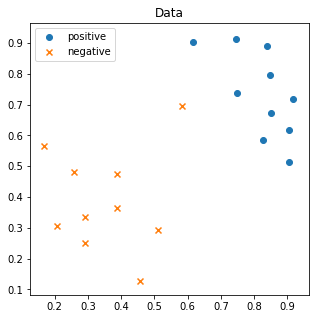

In [4]:
positive, negative, X, Y = populate_data()
plt.close()
%matplotlib inline
plt.rcParams["figure.figsize"] = (5, 5)
plt.scatter(positive[:, 0], positive[:, 1], marker="o", label="positive")
plt.scatter(negative[:, 0], negative[:, 1], marker="x", label="negative")
plt.title("Data")
plt.legend(loc="upper left")
plt.show()

$$w^T * x + b =\begin{cases}\text{positive values } & w^T* x + b \geq 0\\\text{negative values } & w^T* x + b <  0\end{cases}$$

In [5]:
def decision_rule(w, b, x):
    return np.dot(w, x) + b

$$\text{loss = max} (0, 1 - (w^T* x + b) * y)^2$$

In [6]:
def loss(w, b, x, y):
    return np.maximum(0, 1 - ((decision_rule(w, b, x)) * y)) ** 2

$$w_{grad}  =\begin{cases}(-2 *x*y *( 1 - y*(w^T* x + b))) + (2*\lambda *w) & y*(w^T* x + b) < 1\\\vec{0}  & y*(w^T* x + b) > 1\end{cases}$$

$$b_{grad}  =\begin{cases}-2 *y *( 1 - y*(w^T* x + b)) & y*(w^T* x + b) < 1\\\vec{0} & y*(w^T* x + b) > 1\end{cases}$$

In [7]:
def gradient(w, b, x, y, weight_decay):
    if decision_rule(w, b, x) * y < 1:
        w_grad = -2 * x * y * (1 - y * decision_rule(w, b, x)) + (
            2 * weight_decay * w
        )
        b_grad = -2 * y * (1 - y * decision_rule(w, b, x))
    else:
        w_grad = np.array([0.0, 0.0])
        b_grad = np.array([0.0])
    return w_grad, b_grad

In [8]:
def gradient_step(lr, computed_gradient):
    return -(lr * computed_gradient)

In [9]:
def train(w, b, lr, C, num_iter):
    weight_decay = 1/C
    for num_iter in range(num_iter):
        loss_collect = list()
        for iterator in range(len(X)):
            x = X[iterator]
            y = Y[iterator]

            w_grad, b_grad = gradient(w, b, x, y, weight_decay)
            w += gradient_step(lr, w_grad)
            b += gradient_step(lr, b_grad)
            loss_collect.append(loss(w, b, x, y))
        dynamic_print(
            "Step: {} Loss : {} W: {} B:{}".format(
                num_iter+1, np.array(loss_collect).mean(), w, b)
        )
    print("\nTraining Complete")
    return w, b

*The variable that controls the slack $ \xi{i}$* is usaully denoted by $C$

*If $C$ is very large, the classifier becomes very strict and tries to get all points to be on the right side of the hyperplane. If $C$ is very small, the classifier becomes very loose and may "sacrifice" some points to obtain a simpler margin*

_In this implementation the varibale $C$ is dissolved in regularizer, making $ \lambda =  \frac{1}{C}$_

In [17]:
W, B = train(w=np.array([0.0, 0.0]), b=np.array([1.0]), lr=0.001, C=500, num_iter=50000)

Step: 50000 Loss : 0.03220331895843489 W: [6.27717717 3.63338709] B:[-6.50979584]]
Training Complete


In [18]:
%matplotlib inline
def slope_intercept():
    a, b = tuple(W)
    c = B
    return -a / b, -c / b

def plt_decision_boundary():
    slope, intercept = slope_intercept()

    x = np.linspace(0, 1)
    y = slope * x + intercept

    plt.plot(x, y, "-r", label="decision boundary")

    plt.scatter(positive[:, 0], positive[:, 1], marker="o")
    plt.scatter(negative[:, 0], negative[:, 1], marker="x")
    plt.title("Graph of Decision Boundary")
    plt.legend(loc="upper left")
    plt.axis([0.0, 1, 0, 1])
    plt.show()

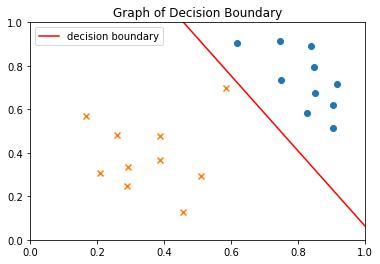

In [19]:
plt_decision_boundary()